# Lab | Handling Data Imbalance in Classification Models

For this lab and in the next lessons we will build a model on customer churn binary classification problem. You will be using files_for_lab/Customer-Churn.csv file.

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic regression model on the training data.
Check the accuracy on the test data.

Note: So far we have not balanced the data.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

## Import the required libraries and modules that you would need

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

%matplotlib inline

## Read that data into Python and call the dataframe churnData

In [2]:
churn_data = pd.read_csv('files_for_lab/Customer-Churn.csv')
churn_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
churn_data.columns = churn_data.columns.str.strip().str.replace(' ', '_').str.lower() 
churn_data.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

## Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.


In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   onlinesecurity    7043 non-null   object 
 7   onlinebackup      7043 non-null   object 
 8   deviceprotection  7043 non-null   object 
 9   techsupport       7043 non-null   object 
 10  streamingtv       7043 non-null   object 
 11  streamingmovies   7043 non-null   object 
 12  contract          7043 non-null   object 
 13  monthlycharges    7043 non-null   float64
 14  totalcharges      7043 non-null   object 
 15  churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
# Convert the "totalcharges" column to numeric type
churn_data['totalcharges'] = pd.to_numeric(churn_data['totalcharges'], errors='coerce')
churn_data.dtypes

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges        float64
churn                object
dtype: object

## Check for null values in the dataframe. Replace the null values.

In [6]:
# Check for null values
null_counts = churn_data.isnull().sum()
null_counts

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

In [7]:
# Look into the "totalcharges" column
total_charges_column = churn_data['totalcharges']
total_charges_column

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [8]:
# Drop NA since they are only few rows
churn_data = churn_data.dropna()

In [9]:
# Check for null values
null_counts = churn_data.isnull().sum()
null_counts

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

## Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges: 
- Scale the features either by using normalizer or a standard scaler
- Split the data into a training set and a test set
- Fit a logistic regression model on the training data
- Check the accuracy on the test data.

In [10]:
# Select the desired features
selected_features = churn_data[['tenure', 'seniorcitizen', 'monthlycharges', 'totalcharges']]
selected_features

,tenure,seniorcitizen,monthlycharges,totalcharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65
...,...,...,...,...
7038,24,0,84.80,1990.50
7039,72,0,103.20,7362.90
7040,11,0,29.60,346.45
7041,4,1,74.40,306.60


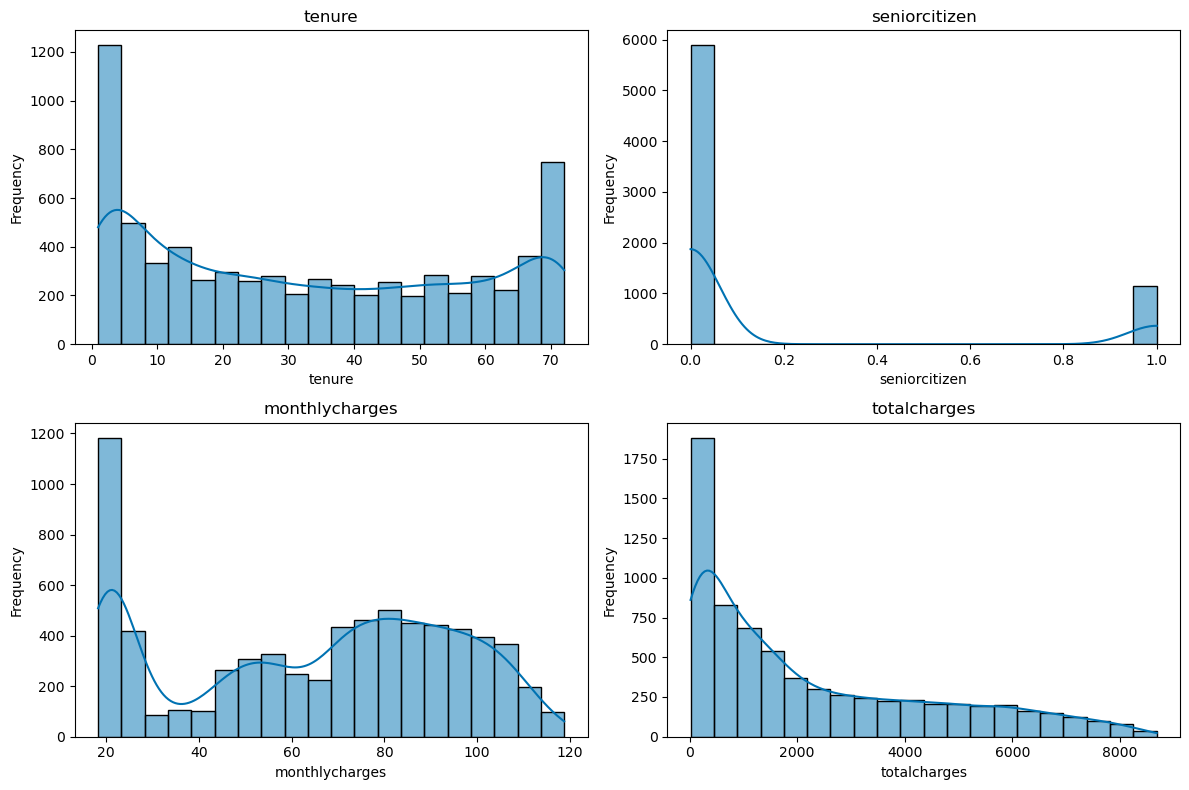

In [11]:
# Visualization of the features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(selected_features.columns):
        break
    sns.histplot(data=selected_features, x=selected_features.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(selected_features.columns[i])
    ax.set_xlabel(selected_features.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(selected_features)
X_standardized = pd.DataFrame(X_scaled, columns=selected_features.columns)
X_standardized

,tenure,seniorcitizen,monthlycharges,totalcharges
0,-1.280248,-0.440327,-1.161694,-0.994194
1,0.064303,-0.440327,-0.260878,-0.173740
2,-1.239504,-0.440327,-0.363923,-0.959649
3,0.512486,-0.440327,-0.747850,-0.195248
4,-1.239504,-0.440327,0.196178,-0.940457
...,...,...,...,...
7027,-0.343137,-0.440327,0.664868,-0.129180
7028,1.612573,-0.440327,1.276493,2.241056
7029,-0.872808,-0.440327,-1.170004,-0.854514
7030,-1.158016,2.271039,0.319168,-0.872095


In [13]:
X = X_standardized
y = churn_data['churn']

In [14]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

In [15]:
# Fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [17]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7803837953091685


## Managing imbalance in the dataset

### Check for the imbalance.

In [18]:
# Check target
churn_data["churn"].value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

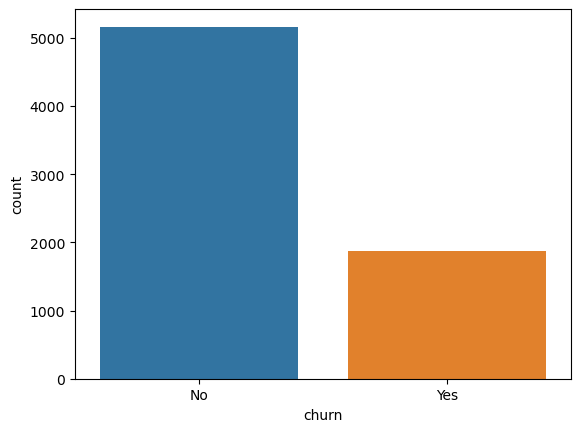

In [19]:
sns.countplot(churn_data["churn"])

A conventional model will not make a reliable and accurate prediction if there is imbalance in the data. The model will be biased towards the class that has more representation. The minority class might be treated as a noise in the model.

### Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes. Each time fit the model and see how the accuracy of the model is.

#### SMOTE

In [20]:
# Apply SMOTE to the training set to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
# Fit a logistic regression model using the resampled training data
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [22]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [23]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7171286425017769


#### TomekLinks

In [24]:
# Apply TomekLinks to the training set to undersample the majority class
tomek = TomekLinks()
X_train_resampled, y_train_resampled = tomek.fit_resample(X_train, y_train)

In [25]:
# Fit a logistic regression model using the resampled training data
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [26]:
# Make predictions on the test set
y_pred = logreg.predict(X_test)

In [27]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.775408670931059


## Conclusion

We had the best accuracy without using upsampling or downsampling methods. TomekLinks was at least better than SMOTE.